In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Spatial Aggreagations

1) Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [96]:
data=pd.read_csv("Data.csv")
grouped_data=data.groupby("state")["PM2.5"].mean()
max_data=grouped_data.idxmax()

print(f"The state with the highest average PM2.5 concentration is '{max_data}' with average value as {round(grouped_data[max_data],2)}")

The state with the highest average PM2.5 concentration is 'Delhi' with average value as 104.1


2) Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [97]:
data=pd.read_csv("Data.csv")
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_2023=data[data["Timestamp"].dt.year==2023]

data_2023=data_2023.dropna(subset=["PM2.5"])

hazardous_PM25=data_2023[data_2023["PM2.5"]>300].copy()
hazardous_PM25.loc[:, "Date"] = hazardous_PM25["Timestamp"].dt.date

hazardous_days = hazardous_PM25.groupby(["state", "Date"]).size().reset_index(name="count")

state_hazardous_days=hazardous_days.groupby("state")["count"].sum()
max_state=state_hazardous_days.idxmax()

print(f"The state with the most days with hazardous PM2.5 levels is '{max_state}' with {state_hazardous_days[max_state]} days")

The state with the most days with hazardous PM2.5 levels is 'Delhi' with 470 days


3) Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [98]:
data=pd.read_csv("Data.csv")
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_2023=data[data["Timestamp"].dt.year==2023]

data_2023=data_2023.dropna(subset=["PM2.5"])
grouped_data_2023=data_2023.groupby("state")["PM2.5"].std()

max_variability=grouped_data_2023.idxmax()
print(f"The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 was '{max_variability}'")

The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 was 'Delhi'


4) Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [99]:
data=pd.read_csv("Data.csv")
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_COVID=data[(data["Timestamp"].dt.year==2020) | (data["Timestamp"].dt.year==2021)]
data_COVID=data_COVID.dropna(subset=["PM2.5"])

avg_data_COVID=data_COVID.groupby("state")["PM2.5"].mean()
min_data_COVID=avg_data_COVID.idxmin()

print(f"The state with the lowest average PM2.5 levels during the Covid period was '{min_data_COVID}' with average PM2.5 value as {round(avg_data_COVID[min_data_COVID],2)}")

The state with the lowest average PM2.5 levels during the Covid period was 'Mizoram' with average PM2.5 value as 14.32


# Temporal Aggregation

1) Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [100]:
data=pd.read_csv("Data.csv")
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_req=data[(data["Timestamp"].dt.year==2020) & (data["Timestamp"].dt.month==8)]
max_value=data_req["PM2.5"].idxmax()
max_value_station=data_req.loc[max_value,"station"]

print(f"The station that recorded the highest value of PM 2.5 for the month Aug of 2020 was '{max_value_station}'")

The station that recorded the highest value of PM 2.5 for the month Aug of 2020 was 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'


2) For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

In [101]:
data=pd.read_csv("Data.csv")
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

# Winter
data_Winter=data[(data["Timestamp"].dt.year==2018) & ((data["Timestamp"].dt.month==12) | (data["Timestamp"].dt.month<=2))]
data_Winter_station=data_Winter.loc[data_Winter["station"].isin(["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"])]
data_Winter_station=data_Winter_station.dropna(subset=["PM2.5"])
avg_data_Winter=data_Winter_station.groupby("station")["PM2.5"].mean()

print(f"Winter:\n{avg_data_Winter}\n")

# Summer
data_Summer=data[(data["Timestamp"].dt.year==2018) & ((data["Timestamp"].dt.month>=3) | (data["Timestamp"].dt.month<=5))]
data_Summer_station=data_Summer.loc[data_Summer["station"].isin(["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"])]
data_Summer_station=data_Summer_station.dropna(subset=["PM2.5"])
avg_data_Summer=data_Summer_station.groupby("station")["PM2.5"].mean()

print(f"Summer:\n{avg_data_Summer}\n")

# Monsoon
data_Monsoon=data[(data["Timestamp"].dt.year==2018) & ((data["Timestamp"].dt.month>=6) | (data["Timestamp"].dt.month<=9))]
data_Monsoon_station=data_Monsoon.loc[data_Monsoon["station"].isin(["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"])]
data_Monsoon_station=data_Monsoon_station.dropna(subset=["PM2.5"])
avg_data_Monsoon=data_Monsoon_station.groupby("station")["PM2.5"].mean()
print(f"Monsoon:\n{avg_data_Monsoon}\n")

Winter:
station
Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB    67.492344
Name: PM2.5, dtype: float64

Summer:
station
Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB    52.729377
Name: PM2.5, dtype: float64

Monsoon:
station
Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB    52.729377
Name: PM2.5, dtype: float64



Can you suggest some potential factors on why certain seasons are generally more polluted than others?



**ANS:**

1) Winter - Temperature inversions trap pollutants, less wind dispersal, more biomass burning.


2) Summer - Strong sunlight increases ozone (O₃) formation, dust storms in dry areas.


3) Monsoon - Rainfall helps wash out pollutants, improving air quality.

3) Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:

Calculate the monthly average PM2.5 for weekdays and weekends separately

X-axis: Months (January to December).

Y-axis: Average PM2.5 levels.

Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends

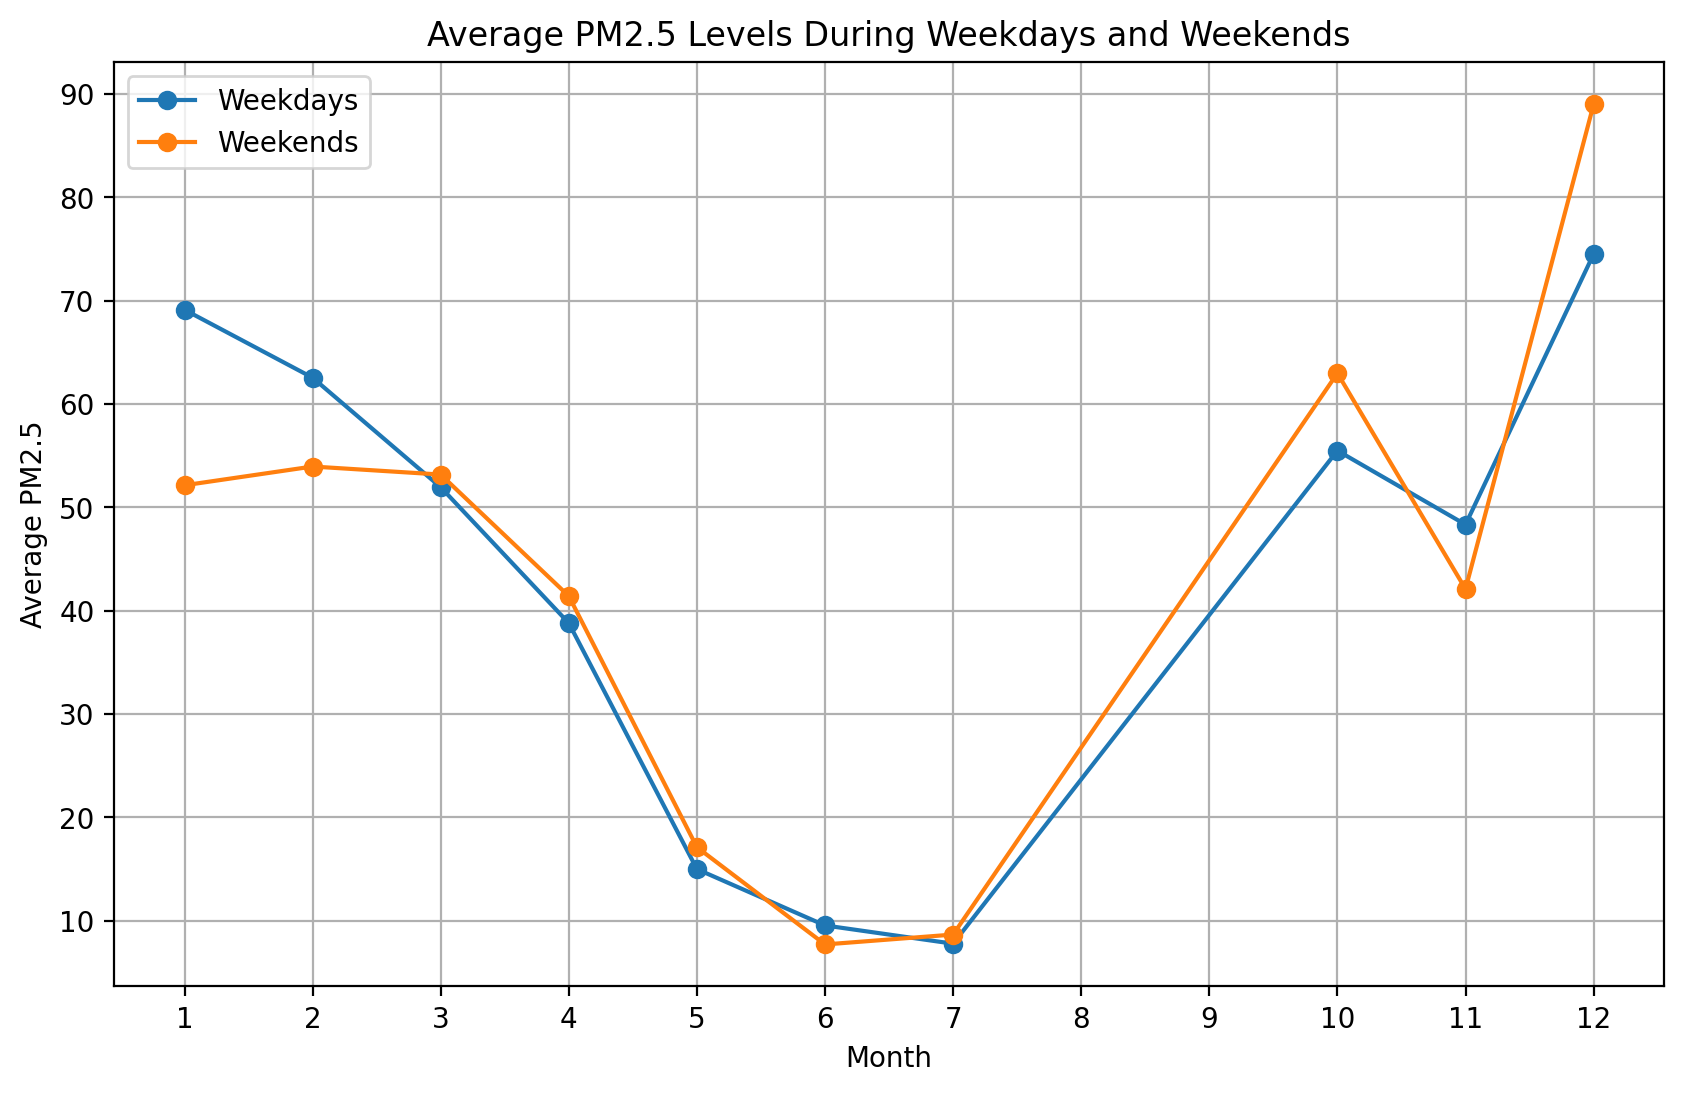

In [102]:
data=pd.read_csv("Data.csv")
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_2021=data[(data["Timestamp"].dt.year==2021) & (data["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

data_2021=data_2021.dropna(subset=["PM2.5"])

data_2021["Month"]=data_2021["Timestamp"].dt.month
data_2021["Day of Week"]=data_2021["Timestamp"].dt.dayofweek

weekdays_data=data_2021[data_2021["Day of Week"]<5]
weekends_data=data_2021[data_2021["Day of Week"]>=5]

month_avg_weekdays=weekdays_data.groupby("Month")["PM2.5"].mean()
month_avg_weekends=weekends_data.groupby("Month")["PM2.5"].mean()

plt.figure(figsize=(10,6))
plt.plot(month_avg_weekdays.index, month_avg_weekdays.values, marker='o', linestyle='-', label="Weekdays")
plt.plot(month_avg_weekends.index, month_avg_weekends.values, marker='o', linestyle='-', label="Weekends")
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 Levels During Weekdays and Weekends")
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

# Spatio-temporal aggregation

1) For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [103]:
data=pd.read_csv("Data.csv")
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_2022=data[data["Timestamp"].dt.year==2022]

data_2022=data_2022.dropna(subset=["PM2.5"])

data_2022["Month"]=data_2022["Timestamp"].dt.month

data_Monsoon=data_2022[(data_2022["Month"]<=9) & (data_2022["Month"]>=6)]
state_monsoon_data=data_Monsoon.groupby("state")["PM2.5"].mean()

data_Summer=data_2022[(data_2022["Month"]<=5) & (data_2022["Month"]>=3)]
state_summer_data=data_Summer.groupby("state")["PM2.5"].mean()

percent_change=((state_monsoon_data-state_summer_data)/state_summer_data)*100

# Here change for every state is negative so decrement so the most negative value will be the highest change.
max_change_state=percent_change.idxmin()

print(f"The state with the most difference (decrease) for the year 2022 was '{max_change_state}' with {round(abs(percent_change[max_change_state]),4)} % change")

The state with the most difference (decrease) for the year 2022 was 'Assam' with 61.1764 % change


2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

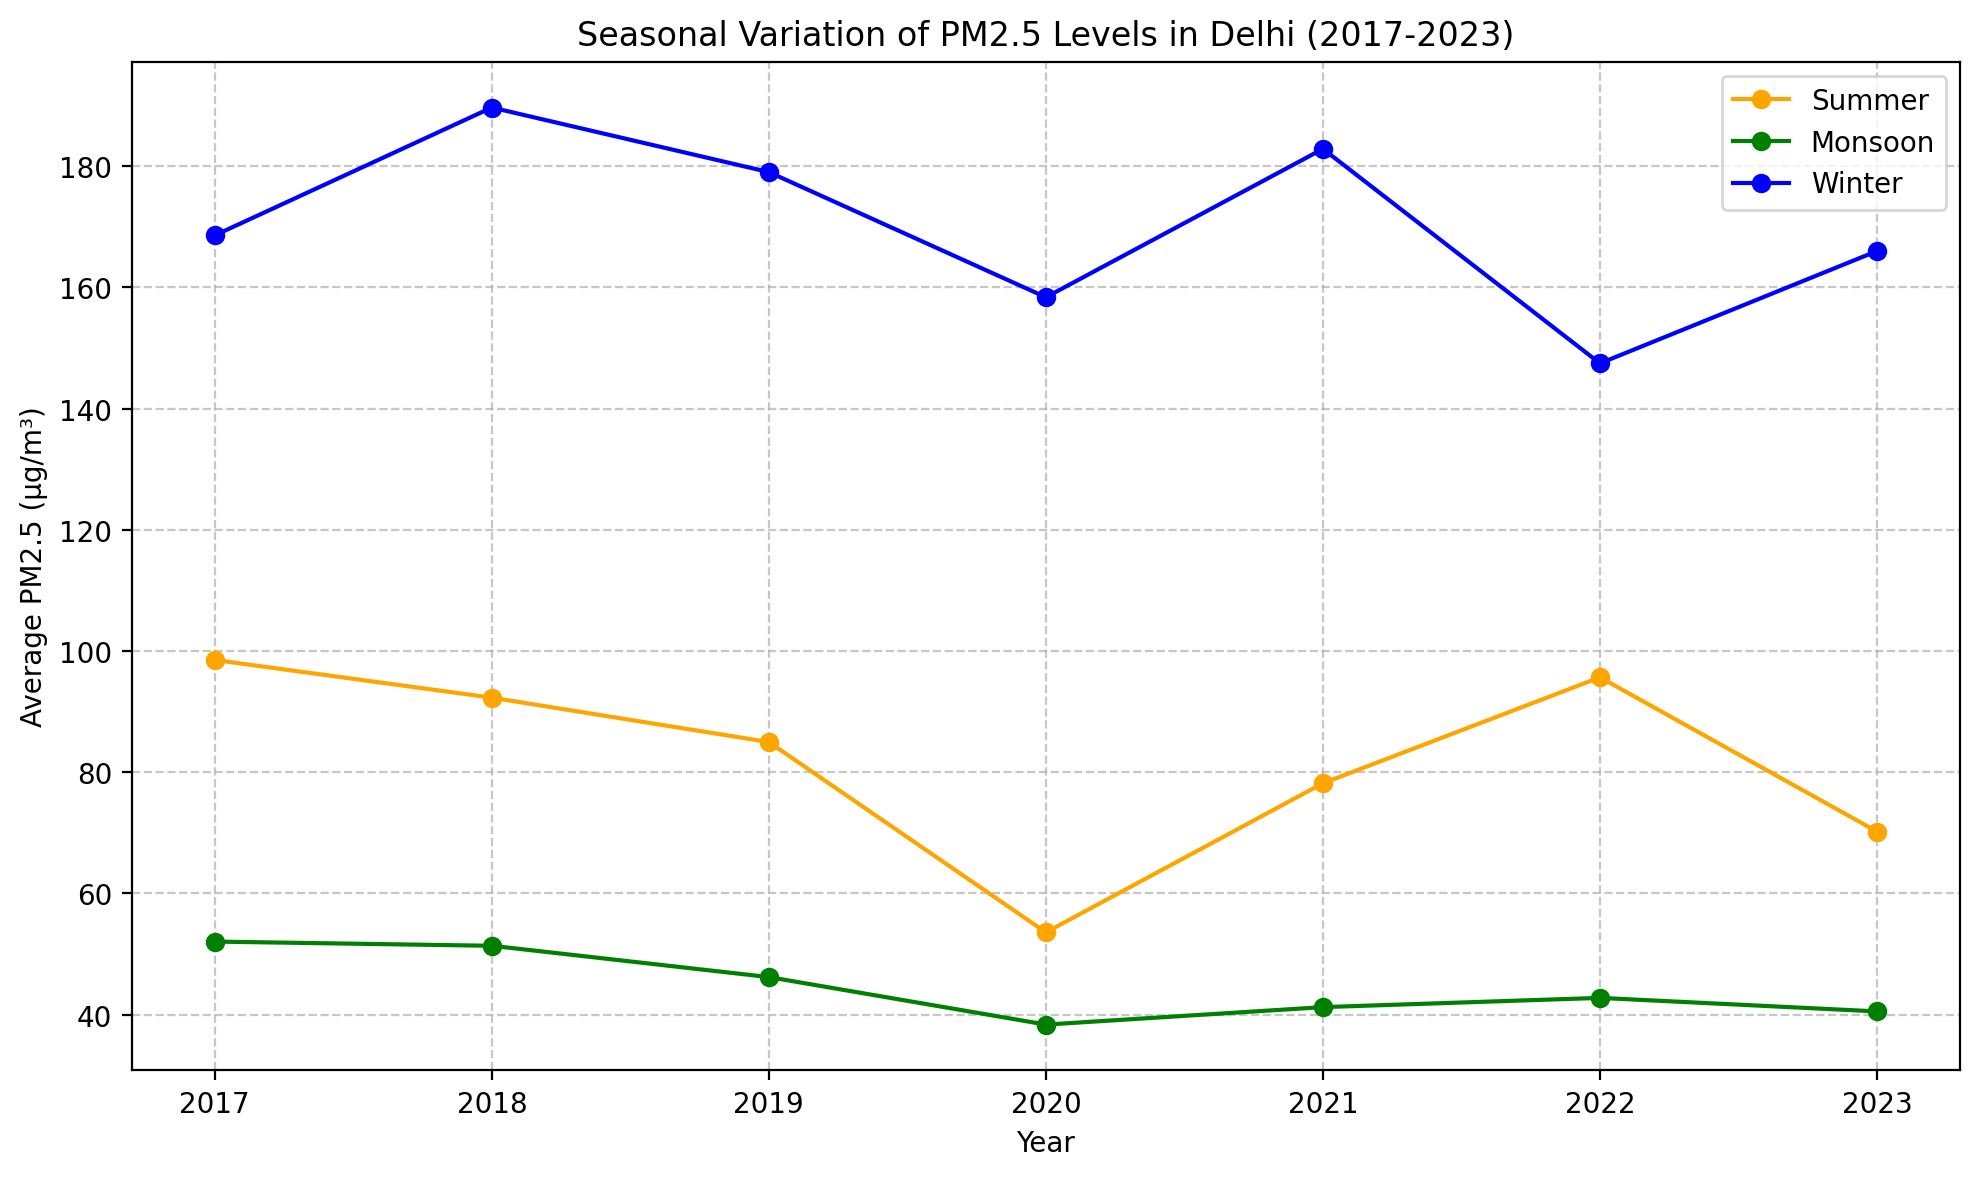

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Data.csv")
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")

data_delhi = data[(data["state"] == "Delhi") & (data["Timestamp"].dt.year >= 2017) & (data["Timestamp"].dt.year <= 2023)]

data_delhi = data_delhi.dropna(subset=["PM2.5"])
data_delhi["Month"] = data_delhi["Timestamp"].dt.month

data_delhi_summer = data_delhi[(data_delhi["Month"] >= 3) & (data_delhi["Month"] <= 5)]
data_delhi_monsoon = data_delhi[(data_delhi["Month"] >= 6) & (data_delhi["Month"] <= 9)]
data_delhi_winter = data_delhi[(data_delhi["Month"] == 12) | (data_delhi["Month"] <= 2)]

avg_delhi_summer = data_delhi_summer.groupby(data_delhi_summer["Timestamp"].dt.year)["PM2.5"].mean()
avg_delhi_monsoon = data_delhi_monsoon.groupby(data_delhi_monsoon["Timestamp"].dt.year)["PM2.5"].mean()
avg_delhi_winter = data_delhi_winter.groupby(data_delhi_winter["Timestamp"].dt.year)["PM2.5"].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_delhi_summer.index, avg_delhi_summer.values, label="Summer", marker='o',color="Orange")
plt.plot(avg_delhi_monsoon.index, avg_delhi_monsoon.values, label="Monsoon", marker='o',color="Green")
plt.plot(avg_delhi_winter.index, avg_delhi_winter.values, label="Winter", marker='o',color="Blue")

plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Winter: PM2.5 levels are usually highest due to low temperatures, temperature inversion, and increased emissions (heating, burning).
# Summer: PM2.5 levels moderately high but lower than winter due to better air circulation.
# Monsoon: PM2.5 levels are lowest due to rainfall washing pollutants away

3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

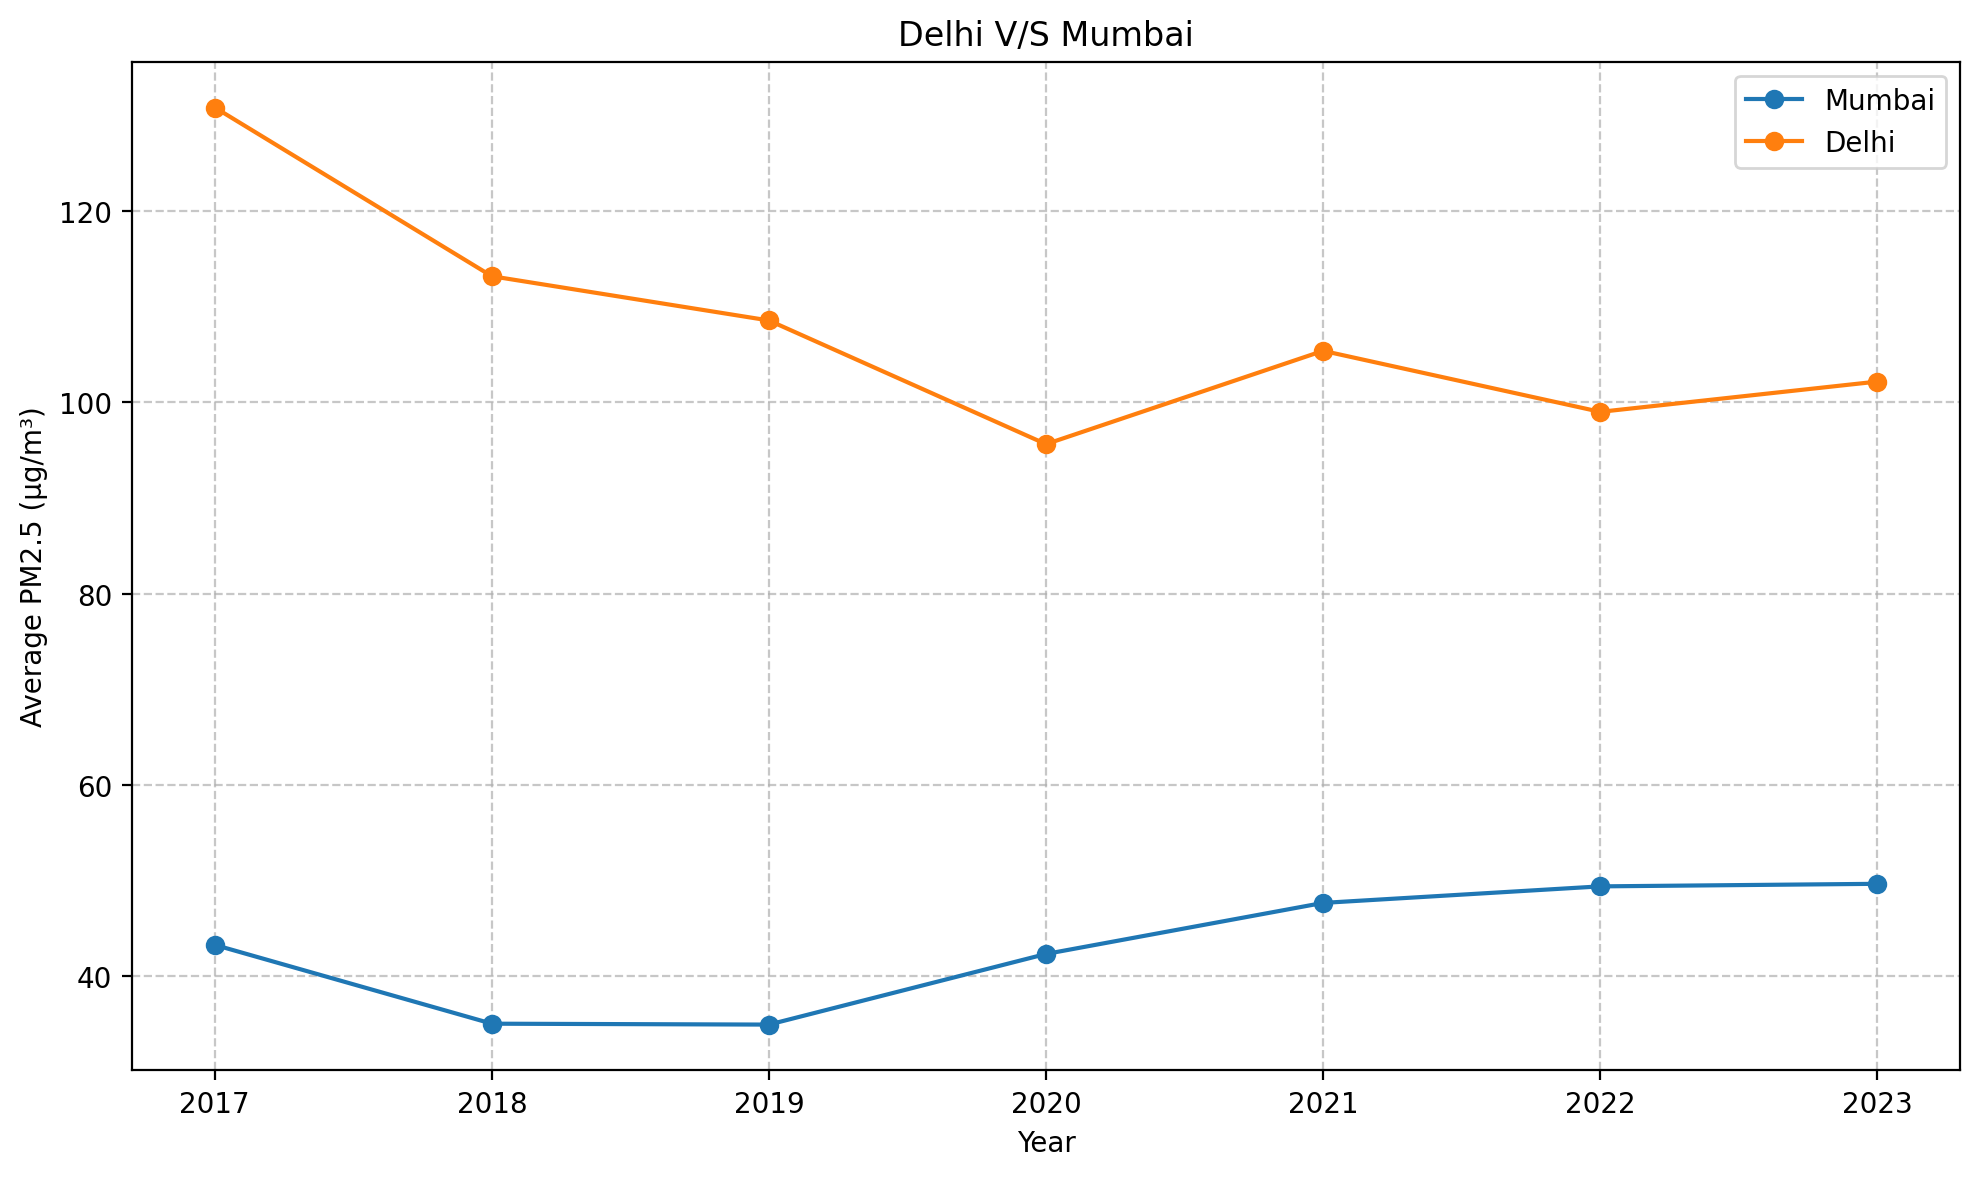

Delhi had more fluctuations


In [105]:
data=pd.read_csv("Data.csv")
data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_req=data[(data["Timestamp"].dt.year>=2015) & (data["Timestamp"].dt.year<=2023) & ((data["state"]=="Delhi") | (data["city"]=="Mumbai"))]

data_req=data_req.dropna(subset=["PM2.5"])
data_req["Year"]=data_req["Timestamp"].dt.year

avg_mumbai=data_req[data_req["city"]=="Mumbai"].groupby("Year")["PM2.5"].mean()
avg_delhi=data_req[data_req["state"]=="Delhi"].groupby("Year")["PM2.5"].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_mumbai.index,avg_mumbai.values,label="Mumbai",marker="o")
plt.plot(avg_delhi.index,avg_delhi.values,label="Delhi",marker="o")
plt.title("Delhi V/S Mumbai")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.7)

plt.tight_layout()
plt.show()

state_fluctuations=data_req.groupby("state")["PM2.5"].std()
city_fluctuations=data_req.groupby("city")["PM2.5"].std()

delhi_fluctuation=state_fluctuations["Delhi"]
mumbai_fluctuation=city_fluctuations["Mumbai"]

if delhi_fluctuation>mumbai_fluctuation:
    print("Delhi had more fluctuations")
else:
    print("Mumbai had more fluctuations")

# Population-Based

1) Which state in India has the highest number of monitoring stations relative to its population?

In [106]:
station_data=pd.read_csv("Data.csv")
population_data=pd.read_csv("State_data.csv")

grouped_station_data=station_data.groupby("state")["station"].count()
grouped_population_data=population_data.groupby("State")["Population"].sum()
relative_data=grouped_station_data/grouped_population_data

max_relative_state=relative_data.idxmax()

print(f"The state with the highest number of monitoring stations relative to its population was '{max_relative_state}'")

The state with the highest number of monitoring stations relative to its population was 'Chandigarh'


2) Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

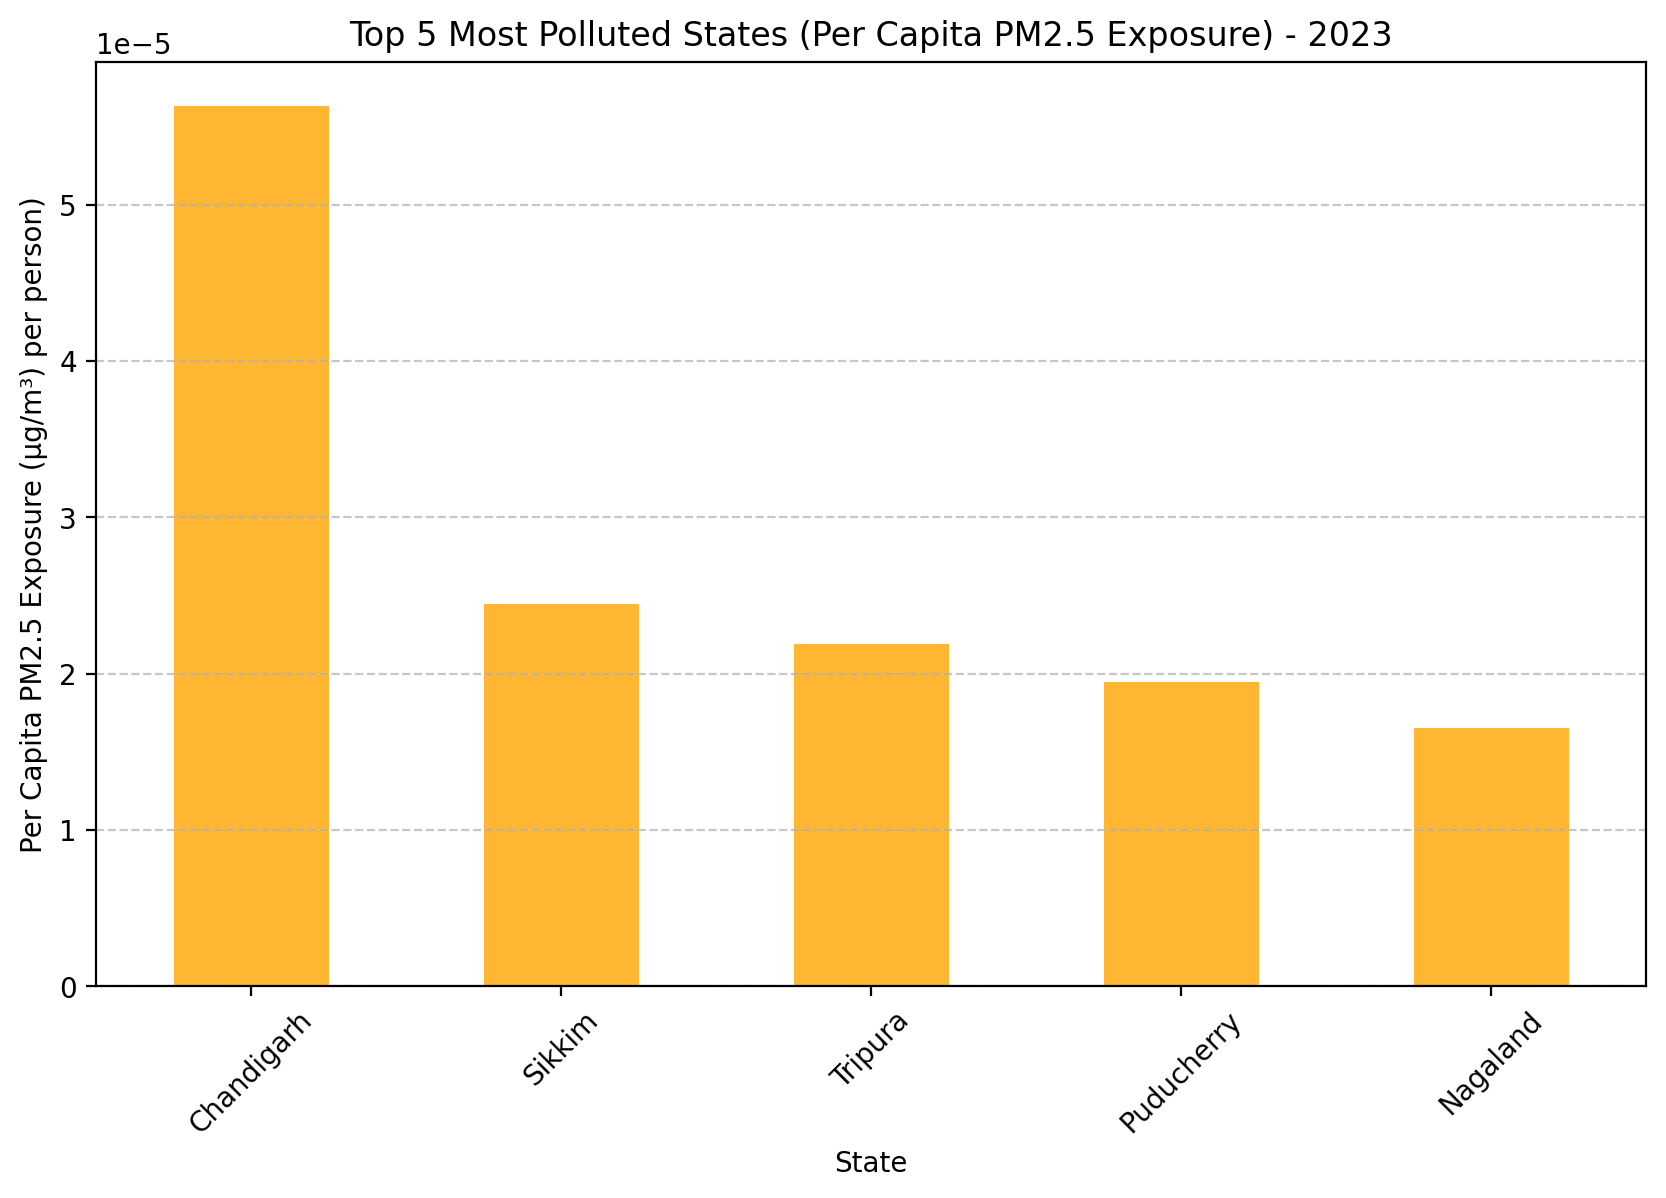

In [107]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")

data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_2023=data[data["Timestamp"].dt.year==2023]
data_2023=data_2023.dropna(subset=["PM2.5"])

pollu_state_data=data_2023.groupby("state")["PM2.5"].mean()
population_data=state_data.groupby("State")["Population"].sum()

per_capita_data=pollu_state_data/population_data
top_5=per_capita_data.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_5.plot(kind="bar", color="orange", alpha=0.8)
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure) - 2023")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure (µg/m³) per person)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)

plt.show()

3) Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.`

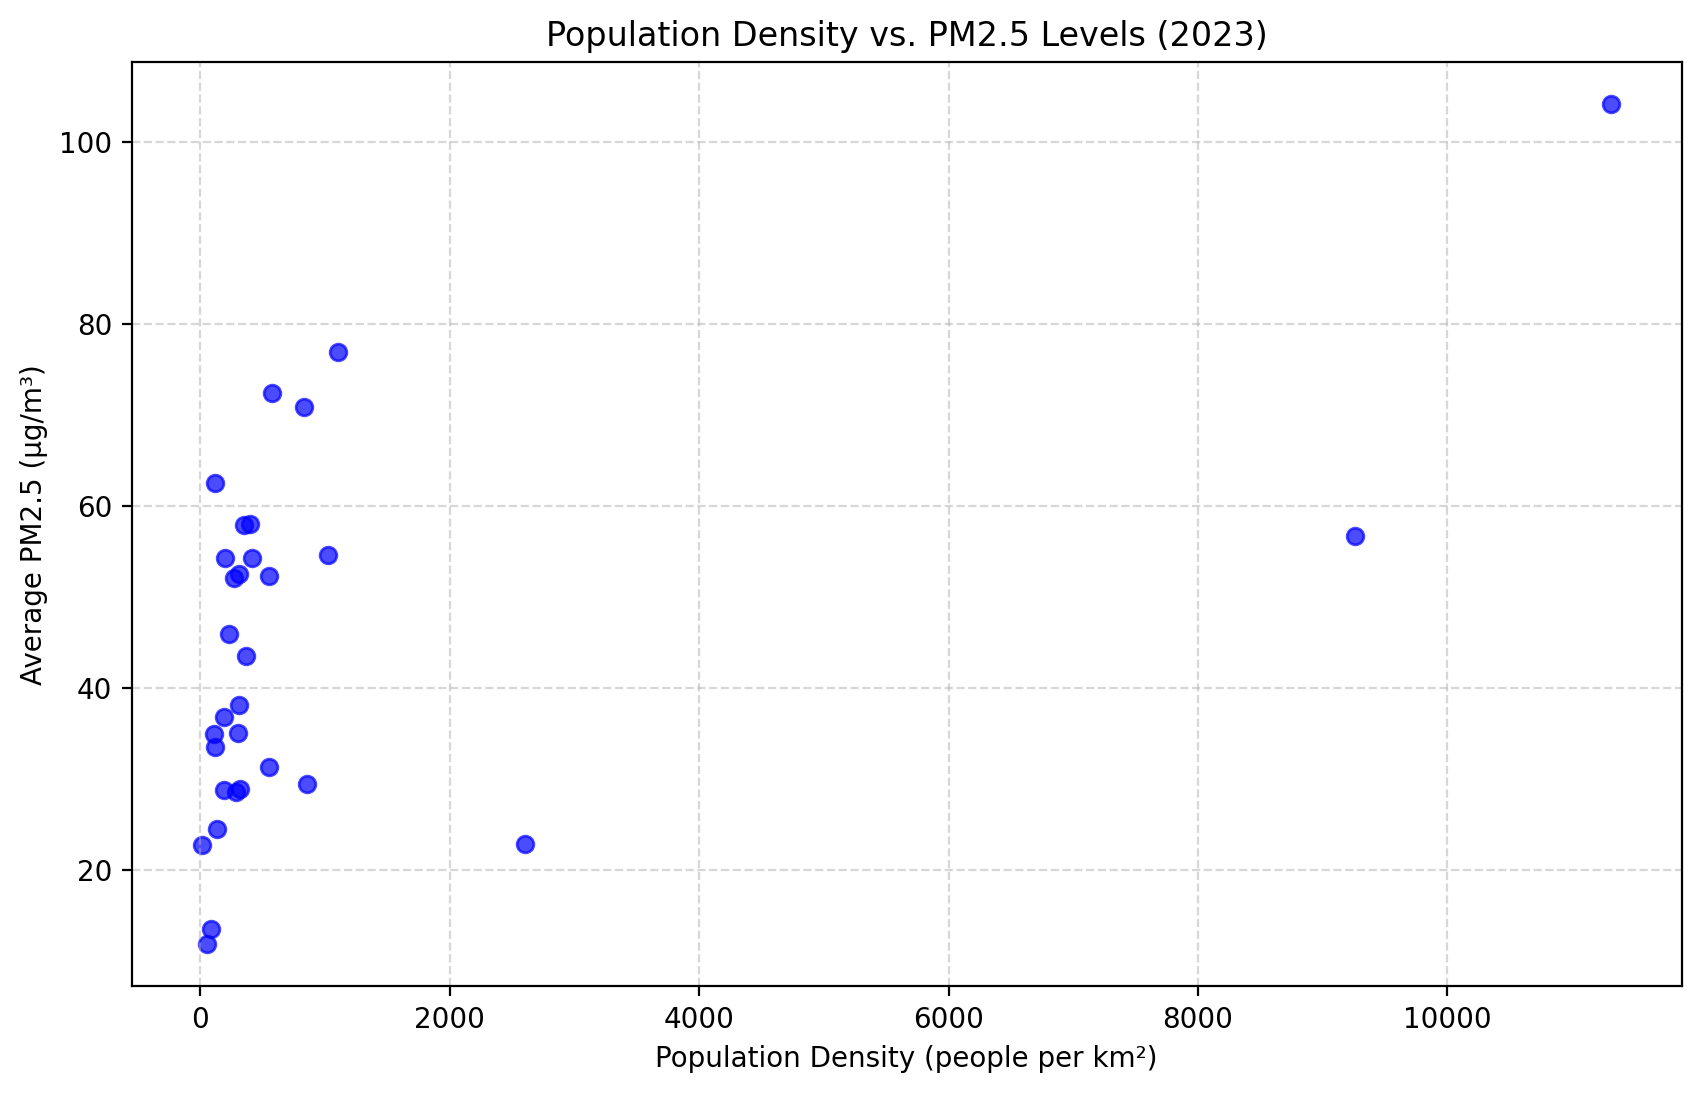

In [108]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")

pollu_state_data=data.groupby("state")["PM2.5"].mean()
population_data=state_data.groupby("State")["Population"].sum()
area_data=state_data.groupby("State")["Area (km2)"].sum()

population_density=population_data/area_data

plt.figure(figsize=(10, 6))
plt.scatter(population_density, pollu_state_data, color="blue", alpha=0.7)

plt.xlabel("Population Density (people per km²)")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Population Density vs. PM2.5 Levels (2023)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

# Area Based

1) Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

The state with the highest PM2.5 concentration per square kilometer is 'Chandigarh'


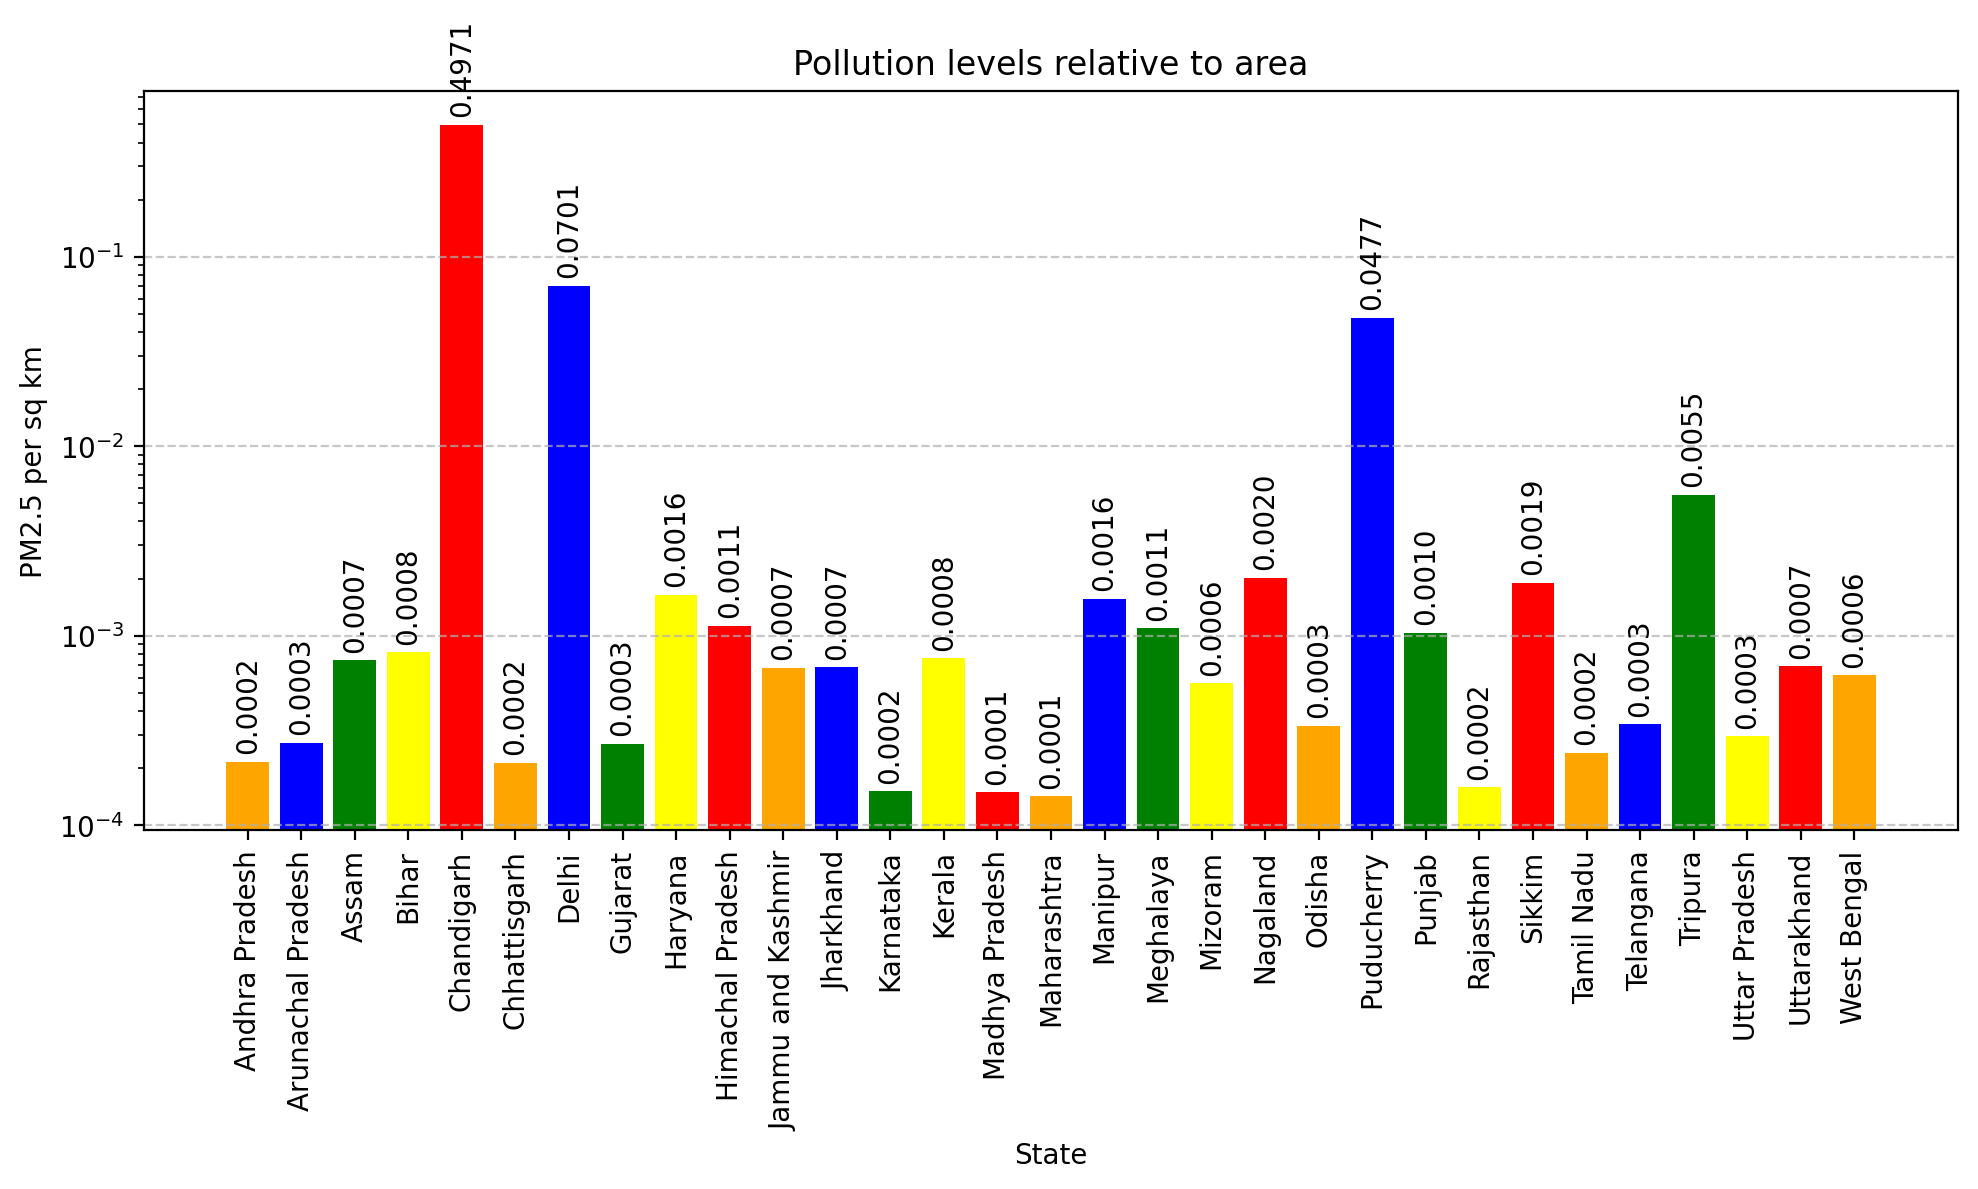

In [109]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")

pollu_state_data=data.groupby("state")["PM2.5"].mean()
area_data=state_data.groupby("State")["Area (km2)"].sum()

pollu_per_sq_km=pollu_state_data/area_data
max_pollu_state=pollu_per_sq_km.idxmax()
print(f"The state with the highest PM2.5 concentration per square kilometer is '{max_pollu_state}'")

plt.figure(figsize=(10,6))
colors=["Orange","Blue","Green","Yellow","Red"]
bars=plt.bar(pollu_per_sq_km.index,pollu_per_sq_km.values,color=colors)
plt.bar_label(bars, fmt="%.4f", label_type="edge", fontsize=10, rotation=90, padding=3)
plt.yscale("log")
plt.title("Pollution levels relative to area")
plt.xlabel("State")
plt.ylabel("PM2.5 per sq km")
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

2) Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

The state with the highest density of monitoring stations relative to its area is 'Delhi'


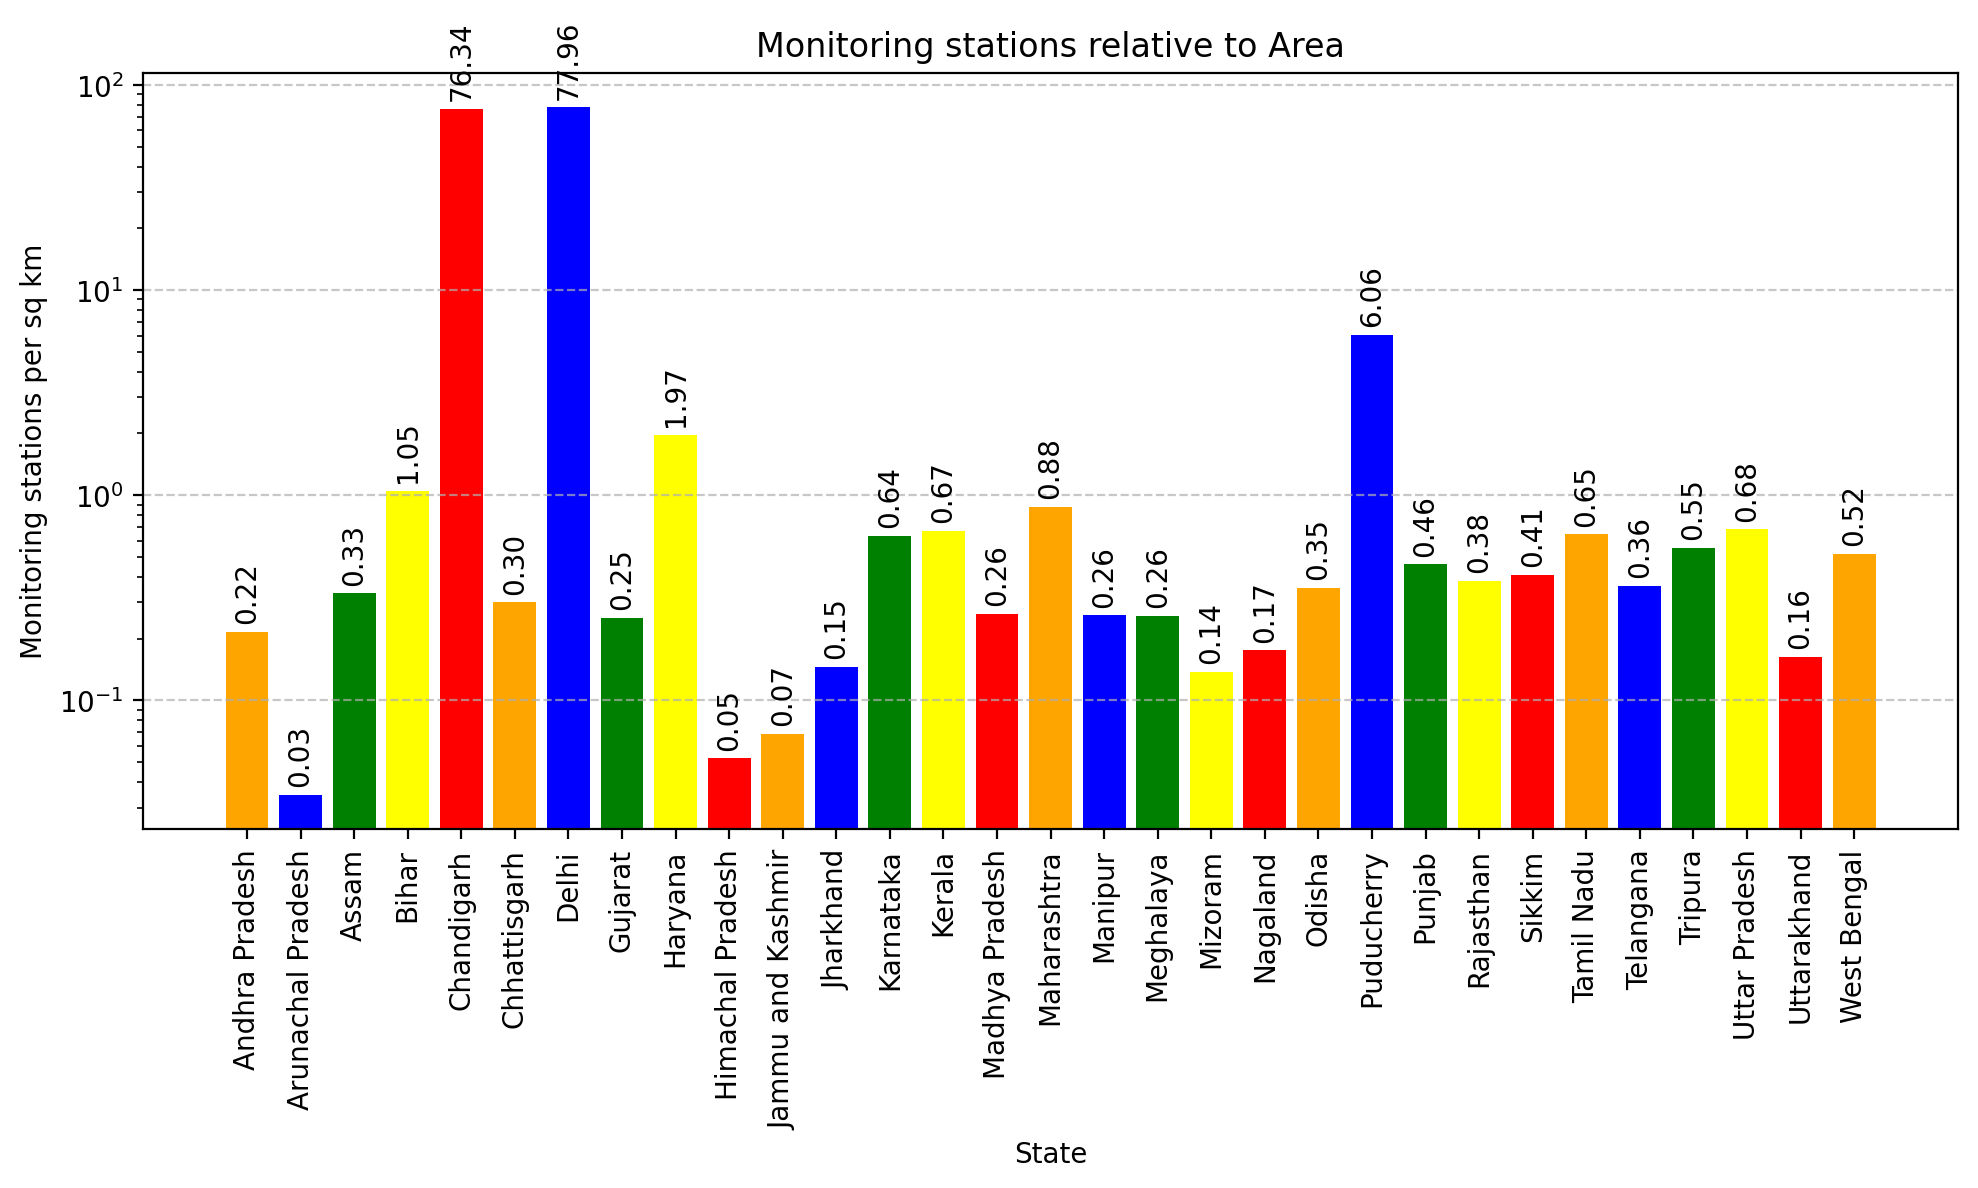

In [110]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")

station_data=data.groupby("state")["station"].count()
area_data=state_data.groupby("State")["Area (km2)"].sum()

station_per_sq_km=station_data/area_data
max_station_state=station_per_sq_km.idxmax()
print(f"The state with the highest density of monitoring stations relative to its area is '{max_station_state}'")

plt.figure(figsize=(10,6))
colors=["Orange","Blue","Green","Yellow","Red"]
bars=plt.bar(station_per_sq_km.index,station_per_sq_km.values,color=colors)
plt.bar_label(bars, fmt="%.2f", label_type="edge", fontsize=10, rotation=90, padding=3)
plt.yscale("log")
plt.title("Monitoring stations relative to Area")
plt.xlabel("State")
plt.ylabel("Monitoring stations per sq km")
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

3) Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [111]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")

data["Timestamp"]=pd.to_datetime(data["Timestamp"],errors="coerce")

data_2021=data[data["Timestamp"].dt.year==2021]
data_2021=data_2021.dropna(subset=["PM2.5"])

grouped_data=data_2021.groupby("state")["PM2.5"].mean()

maharashtra_data=grouped_data["Maharashtra"]
madhya_pradesh_data=grouped_data["Madhya Pradesh"]

state_population=state_data.groupby("State")["Population"].sum()
maharashtra_population=state_population["Maharashtra"]
madhya_pradesh_population=state_population["Madhya Pradesh"]

area_data=state_data.groupby("State")["Area (km2)"].sum()
maharashtra_area=area_data["Maharashtra"]
madhya_pradesh_area=area_data["Madhya Pradesh"]

population_density_maharashtra=maharashtra_population/maharashtra_area
population_density_madhya_pradesh=madhya_pradesh_population/madhya_pradesh_area

if (population_density_maharashtra>population_density_madhya_pradesh) & (maharashtra_data>madhya_pradesh_data):
    print("Maharashtra has more pollution and more population density, meaning more people so, more pollution.")
elif (population_density_maharashtra>population_density_madhya_pradesh) & (maharashtra_data<madhya_pradesh_data):
    print("Madhya Pradesh has more pollution but less population density, meaning the major sources of pollution are industries and manufacturing.")
elif (population_density_maharashtra<population_density_madhya_pradesh) & (maharashtra_data<madhya_pradesh_data):
    print("Madhya Pradesh has more pollution and more population density, meaning more people so, more pollution.")
else:
  print("Maharashtra has more pollution but less population density, meaning the major sources of pollution are industries and manufacturing.")


Madhya Pradesh has more pollution but less population density, meaning the major sources of pollution are industries and manufacturing.


# Funding Based

1) Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [112]:
data=pd.read_csv("Data.csv")
state_data=pd.read_csv("State_data.csv")
funding_data=pd.read_csv("NCAP_Funding.csv")

data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data["Year"]=data["Timestamp"].dt.year

funding_2021 = funding_data[funding_data["Amount released during FY 2021-22"] != "-"]

funded_states_2021 = set(funding_2021["State"])

funded_pollution = data[data["state"].isin(funded_states_2021)]
non_funded_pollution = data[~data["state"].isin(funded_states_2021)]

avg_pm25_funded = funded_pollution["PM2.5"].mean()
avg_pm25_not_funded = non_funded_pollution["PM2.5"].mean()

print(f"Average PM2.5 in NCAP funded states (2021): {avg_pm25_funded:.2f}")
print(f"Average PM2.5 in non-funded states (2021): {avg_pm25_not_funded:.2f}")

Average PM2.5 in NCAP funded states (2021): 62.07
Average PM2.5 in non-funded states (2021): 52.87


2) Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

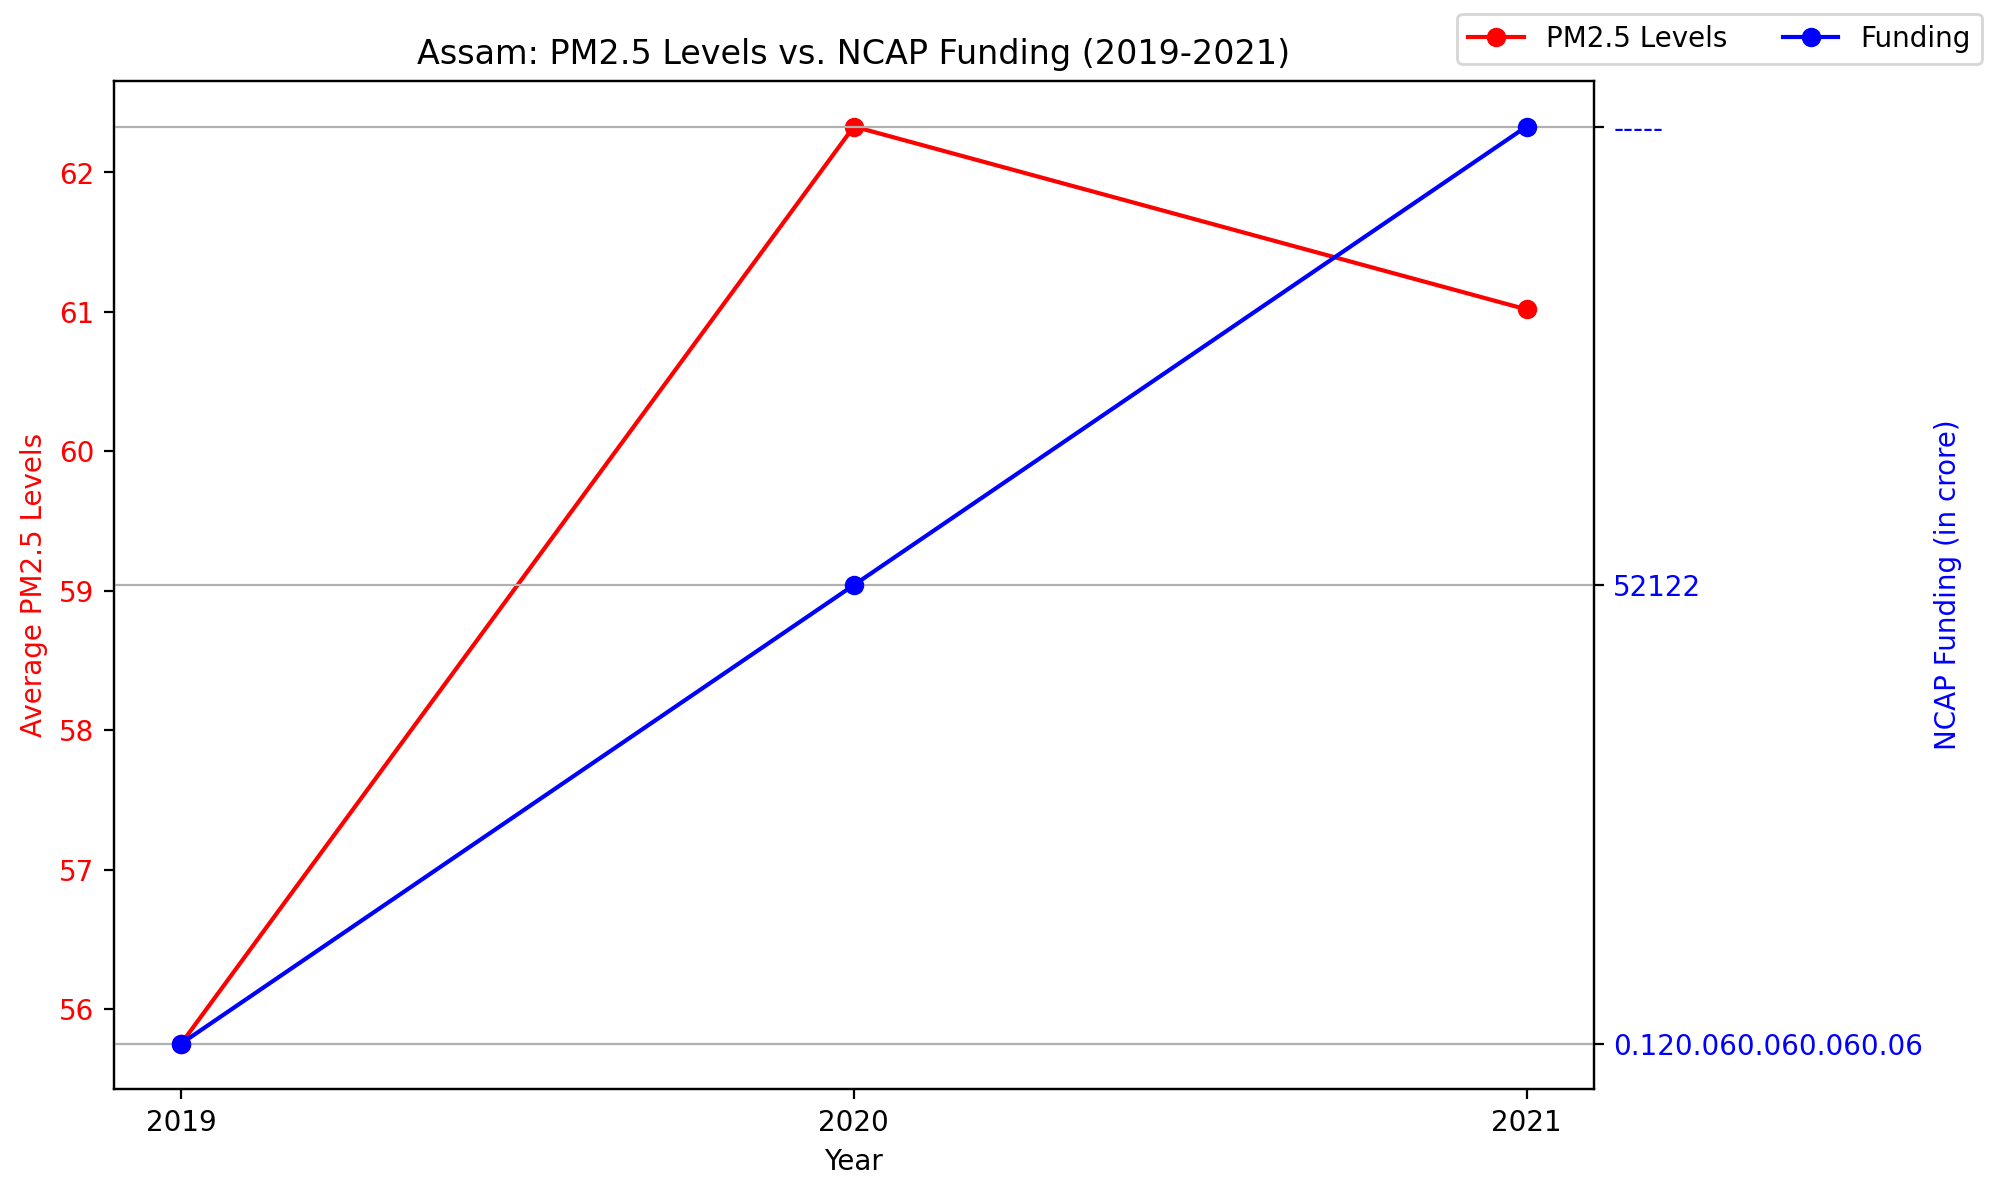

In [116]:
assam_funding = funding_data[funding_data['State'] == 'Assam']

data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data["Year"]=data["Timestamp"].dt.year

data_2019 = data[data['Year'] == 2019]
data_2020 = data[data['Year'] == 2020]


assam_19 = assam_funding.groupby('State')['Amount released during FY 2019-20'].sum().values[0]
assam_20 = assam_funding.groupby('State')['Amount released during FY 2020-21'].sum().values[0]
assam_21 = assam_funding.groupby('State')['Amount released during FY 2021-22'].sum().values[0]

assam_pm2_19 = data_2019[data_2019['state'] == 'Assam']['PM2.5'].mean()
assam_pm2_20 = data_2020[data_2020['state'] == 'Assam']['PM2.5'].mean()
assam_pm2_21 = data_2021[data_2021['state'] == 'Assam']['PM2.5'].mean()


years = [2019, 2020, 2021]
funding_values = [assam_19, assam_20, assam_21]
pm25_values = [assam_pm2_19, assam_pm2_20, assam_pm2_21]

fig, ax1 = plt.subplots(figsize = (10, 6))

ax1.plot(years, pm25_values, label = 'PM2.5 Levels', color = 'red', marker = 'o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels', color='red')
ax1.tick_params(axis = 'y', labelcolor = 'red')
ax1.set_xticks(years)

ax2 = ax1.twinx()
ax2.plot(years, funding_values, label = 'Funding', color = 'blue', marker = 'o')
ax2.set_ylabel('NCAP Funding (in crore)', color = 'blue')
ax2.tick_params(axis = 'y', labelcolor = 'blue')

plt.title('Assam: PM2.5 Levels vs. NCAP Funding (2019-2021)')
fig.legend(loc = "upper right", ncol = 2)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
assam_funding = funding_data[funding_data['State'] == 'Assam']
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data["Year"]=data["Timestamp"].dt.year

data_2019 = data[data['Year'] == 2019]

assam_19 = assam_funding.groupby('State')['Amount released during FY 2019-20'].sum().values[0]
assam_20 = assam_funding.groupby('State')['Amount released during FY 2020-21'].sum().values[0]
assam_21 = assam_funding.groupby('State')['Amount released during FY 2021-22'].sum().values[0]

assam_pm2_19 = data_2019[data_2019['state'] == 'Assam']['PM2.5'].mean()
assam_pm2_20 = data_2020[data_2020['state'] == 'Assam']['PM2.5'].mean()
assam_pm2_21 = data_2021[data_2021['state'] == 'Assam']['PM2.5'].mean()


years = [2019, 2020, 2021]
funding_values = [assam_19, assam_20, assam_21]
pm25_values = [assam_pm2_19, assam_pm2_20, assam_pm2_21]

fig, ax1 = plt.subplots(figsize = (10, 6))

ax1.plot(years, pm25_values, label = 'PM2.5 Levels', color = 'red', marker = 'o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels', color='red')
ax1.tick_params(axis = 'y', labelcolor = 'red')
ax1.set_xticks(years)

ax2 = ax1.twinx()
ax2.plot(years, funding_values, label = 'Funding', color = 'blue', marker = 'o')
ax2.set_ylabel('NCAP Funding (in crore)', color = 'blue')
ax2.tick_params(axis = 'y', labelcolor = 'blue')

plt.title('Assam: PM2.5 Levels vs. NCAP Funding (2019-2021)')
fig.legend(loc = "upper right", ncol = 2)
plt.grid(True)
plt.tight_layout()
plt.show()

# No increase in funding has led to a decrease in air quality as compared to 2019 and increased a little in 2021 as compared to 2020.

3) Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

In [ ]:
funding_data = pd.read_csv('NCAP_Funding.csv')
state_data = pd.read_csv('State_data.csv')

numeric_columns = ['Amount released during FY 2019-20', 'Amount released during FY 2020-21',
                   'Amount released during FY 2021-22', 'Total fund released', 'Utilisation as on June 2022']
for col in numeric_columns:
    funding_data[col] = pd.to_numeric(funding_data[col].replace('-', '0'), errors='coerce')

state_funding = funding_data.groupby('State')['Total fund released'].sum().reset_index()

merged_data = pd.merge(state_funding, state_data, on='State', how='inner')

plt.figure(figsize=(12, 8))
scatter = plt.scatter(merged_data['Area (km2)'], merged_data['Total fund released'],
                      c=range(len(merged_data)), cmap='viridis')

plt.xlabel('State Area (km²)')
plt.ylabel('Total Funding Received (Cr)')
plt.title('State Area vs Total NCAP Funding Received')

cbar = plt.colorbar(scatter)
cbar.set_label('States')
cbar.set_ticks(range(len(merged_data)))
cbar.set_ticklabels(merged_data['State'])

plt.tight_layout()
plt.show()

# Miscellaneous Questions

1) For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]

In [ ]:
data = pd.read_csv("Data.csv")

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

data_2023 = data[data['Timestamp'].dt.year == 2023].dropna(subset=['PM2.5', 'city'])

most_polluted_city = data_2023.groupby('city')['PM2.5'].mean().idxmax()

daily_avg_pm25 = data_2023[data_2023['city'] == most_polluted_city].groupby(data_2023['Timestamp'].dt.date)['PM2.5'].mean()

hazardous_percentage = (daily_avg_pm25 > 300).mean() * 100

print(f"Most Polluted City in 2023: {most_polluted_city}")
print(f"Percentage of Hazardous Days (>300 µg/m³): {hazardous_percentage:.2f}%")

2) Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

In [ ]:
data_delhi = data[data['state'] == 'Delhi']
data_diwali_del = data_delhi[(data_delhi['Timestamp'].dt.month == 10) | (data_delhi['Timestamp'].dt.month == 11)]
data_rmonths_del = data_delhi[data_delhi['Timestamp'].dt.month.isin([1, 2, 3, 4, 5, 6, 7, 8, 9])]

data_diwali_del['Timestamp'] = pd.to_datetime(data_diwali_del['Timestamp'],errors="coerce")
data_rmonths_del['Timestamp'] = pd.to_datetime(data_rmonths_del['Timestamp'],errors="coerce")

data_diwali_del["Year"]=data_diwali_del["Timestamp"].dt.year
data_rmonths_del["Year"]=data_rmonths_del["Timestamp"].dt.year

diwali_3years = data_diwali_del[(data_diwali_del['Year'] >= 2018) & (data_diwali_del['Year'] <= 2020)]
rmonths_3years = data_rmonths_del[(data_rmonths_del['Year'] >= 2018) & (data_rmonths_del['Year'] <= 2020)]

diwali_avg_pm = diwali_3years.groupby(diwali_3years['Timestamp'].dt.date)['PM2.5'].mean()
rmonths_avg_pm = rmonths_3years.groupby(rmonths_3years['Timestamp'].dt.date)['PM2.5'].mean()

plt.figure(figsize=(12, 6))
diwali_avg_pm.plot(label = 'Diwali (Oct-Nov)', color = 'red')
rmonths_avg_pm.plot(label = 'Regular Months', color = 'blue')

for Year in [2018, 2019, 2020]:
    data_diwali_Year = diwali_3years[diwali_3years['Year'] == Year]
    diwali_avg_pm_Year = data_diwali_Year.groupby(data_diwali_Year['Timestamp'].dt.date)['PM2.5'].mean()
    spike_date_Year = diwali_avg_pm_Year.idxmax()
    spike_value_Year = diwali_avg_pm_Year.max()

    plt.annotate('Peak', xy = (spike_date_Year, spike_value_Year), xytext = (spike_date_Year, spike_value_Year + 50), arrowprops = dict(facecolor = 'black', arrowstyle = '->'), color='black')

plt.title('PM2.5 Levels in Delhi (2018-2020) - Diwali vs Regular Months', pad = 30)
plt.xlabel('Date')
plt.ylabel('PM2.5 Level (µg/m³)')
plt.legend(title = 'Period')
plt.grid(True)
plt.show()

3) Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

In [ ]:
highest_funding_state = funding_data.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()

print(f"State with highest NCAP funding in 2020: {highest_funding_state}")

data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")
data["Year"]=data["Timestamp"].dt.year
state_pm_trend = data[data['state'] == highest_funding_state].groupby('Year')['PM2.5'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x = state_pm_trend.index, y = state_pm_trend.values, marker = 'o', linewidth = 2, color = 'b')

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level (μg/m³)")
plt.xlim(2019.99,2023.01)
plt.xticks([2020,2021,2022,2023])
plt.title(f"Yearly PM2.5 Trend in {highest_funding_state} (2020-2023)")
plt.grid(True)

plt.show()

4) Draw the map of India and plot the sensor locations on the map.

In [ ]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")
india_map = world[world["ADMIN"] == "India"]

sensor_data = pd.read_csv("Data.csv")

fig, ax = plt.subplots(figsize=(10, 8))
india_map.plot(ax=ax, color="orange", edgecolor="black")

plt.scatter(sensor_data["longitude"], sensor_data["latitude"],
            color="brown", marker="o", edgecolors="black", s=25, label="Sensor")

plt.title("Sensor Locations in India", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.show()

# Tell us something new

Q) Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

Mismatch Between Pollution Levels and NCAP Funding

Some cities have high PM2.5 levels (top 25%) but received low funding (bottom 25%), suggesting they may have been overlooked in NCAP allocations.
Conversely, some cities received high funding but still have low improvement in air quality, indicating either inefficient fund utilization or external pollution sources.
Examples from the Data
High Pollution, Low Funding:

Angul (Odisha): PM2.5 = 118.56 µg/m³, NCAP funding = ₹1.2 crore
Nalbari (Assam): PM2.5 = 104.00 µg/m³, NCAP funding = ₹1.06 crore
Rourkela (Odisha): PM2.5 = 93.19 µg/m³, NCAP funding = ₹1.2 crore
These cities have some of the highest pollution levels but received minimal NCAP funds, suggesting possible oversight.
High Funding, Limited Pollution Improvement:

Chandigarh: NCAP funding = ₹17.89 crore, PM2.5 = 32.89 - 44.36 µg/m³
Srinagar (J&K): NCAP funding = ₹12.95 crore, PM2.5 = 28.33 µg/m³
These cities received significant funding but already have relatively low PM2.5 levels, raising concerns about fund allocation efficiency.